# CS Project 175 Phase 1

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing

import seaborn

# Analyzing the Data

In [3]:
data = pd.read_csv('../data/data.csv')
del data['Unnamed: 0']
data.head()

,title,genre,lyrics
0,the number of the beast,metal,woe to you o'er earth and sea\r\nfor the devil...
1,fear of the dark,metal,i am a man who walks alone\r\nand when i'm wal...
2,the trooper,metal,you'll take my life but i'll take yours too\r\...
3,hallowed be thy name,metal,i'm waiting in my cold cell when the bell begi...
4,run to the hills,metal,white man came across the sea\r\nhe brought us...


Num of rows 40536
biggest class:  27874
smallest class:  12662


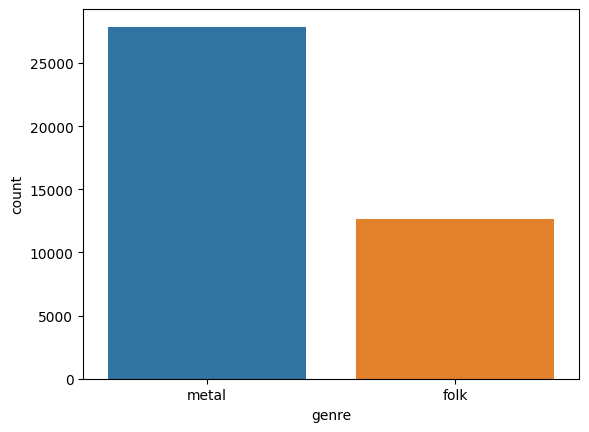

In [4]:
# plot labels
print('Num of rows', len(data))
seaborn.countplot(data, x='genre')
print('biggest class: ', (data['genre'] == data['genre'].value_counts().idxmax()).sum())
print('smallest class: ', (data['genre'] == data['genre'].value_counts().idxmin()).sum())


## Building the Pipeline

In [13]:
RANDOM_STATE = 42

def gather_data():
    data = pd.read_csv('../data/data.csv')
    return data['lyrics'], data['genre']

def vectorize_labels(labels, classes=None):
    '''
    Vectorizes the labels.
    Returns as (indexes, labels)
    '''
    if classes is None:
        return pd.factorize(labels)
    return pd.Categorical(labels, categories=classes).codes, classes

def features_bow(data):
    vectorizer = CountVectorizer(stop_words='english', min_df=0.01, ngram_range=(1, 2))
    text = data.to_list()
    X = vectorizer.fit_transform(text)
    return X, vectorizer

def train_model_logistic(X, Y):
    classifier = linear_model.LogisticRegression(penalty='l2', multi_class='multinomial', random_state=RANDOM_STATE, fit_intercept=True)
    classifier.fit(X, Y)
    return classifier

def evaluate_logistic_model(model, X_train, Y_train, X_test, Y_test):
    train_accuracy = model.score(X_train, Y_train)
    print('\nTraining:')
    print(' accuracy:',format( 100*train_accuracy , '.2f') ) 

    # Compute and print accuracy on the test data
    print('\nTesting: ')
    test_accuracy = model.score(X_test, Y_test)
    print(' accuracy:', format( 100*test_accuracy , '.2f') )

    # Compute and print AUC on the test data
    class_probabilities = model.predict_proba(X_test)[:, 1]
    test_auc_score = metrics.roc_auc_score(Y_test, class_probabilities)
    print(' AUC value:', format( 100*test_auc_score , '.2f') )

## Executing the Pipeline

In [6]:
# Phase 1 pipeline
inputs, labels = gather_data()


In [7]:
# convert to features
Y, classes = vectorize_labels(labels)
X, vectorizer = features_bow(inputs)

In [8]:
# split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=RANDOM_STATE)

In [9]:
# train model
model = train_model_logistic(X_train, Y_train)

c:\Users\ajiev\cs175-project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluating the Model

In [14]:
evaluate_logistic_model(model, X_train, Y_train, X_test, Y_test)


Training:
 accuracy: 85.26

Testing: 
 accuracy: 83.73
 AUC value: 89.91


In [27]:
def most_significant_terms(weights, vectorizer, K):
    pos_indices = np.argpartition(weights, -K)[-K:] # gather the K most positive indices
    pos_indices = pos_indices[np.argsort(-weights[pos_indices])] # sort the indices

    neg_indices = np.argpartition(weights, K)[:K] # gather the K most negative indices
    neg_indices = neg_indices[np.argsort(weights[neg_indices])] # sort the indices

    topK_pos_weights = weights[pos_indices]
    topK_neg_weights = weights[neg_indices]

    # gather the associated terms
    terms = vectorizer.get_feature_names_out()
    topK_pos_terms = terms[pos_indices]
    topK_neg_terms = terms[neg_indices]
        
    print('Most Significant Terms for Class: "folk"')
    for i in range(len(topK_pos_weights)):
        print(format(topK_pos_weights[i], '.3f'), topK_pos_terms[i])
    
    print('Most Significant Terms for Class: "metal"')
    for i in range(len(topK_neg_weights)):
        print(format(topK_neg_weights[i]*-1, '.3f'), topK_neg_terms[i])



In [23]:
classes

Index(['metal', 'folk'], dtype='object')

In [28]:
most_significant_terms(model.coef_[0], vectorizer, 5)
print()

Most Significant Terms for Class: "folk"
0.346 soft
0.310 wife
0.305 grown
0.253 clothes
0.251 flowers
Most Significant Terms for Class: "metal"
0.667 eternal
0.560 fuck
0.522 fucking
0.487 check
0.472 fuckin



In [29]:

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

np.random.seed(RANDOM_STATE)
NUM_EXAMPLES = 10
for _ in range(NUM_EXAMPLES):
    i = np.random.choice(np.where(predictions != Y_test)[0])
    print("Song Title:", data['title'][i])
    print('Predicted:', classes[predictions[i]], 'Actual:', classes[Y_test[i]])
    print('Probability:', probabilities[i][predictions[i]])
    print("Lyrics: ")
    print('"' + data['lyrics'][i][:100] + '..."')
    print()


Song Title: abuse part 2 confessions
Predicted: folk Actual: metal
Probability: 0.7118007779966572
Lyrics: 
" i was babysitting my little cousin and his father has these this little stash of these little women..."

Song Title: house of pain demo
Predicted: folk Actual: metal
Probability: 0.645859633745129
Lyrics: 
"say you're gonna leave me
'cause i only tie you up
i always love you tender
but you only like it ..."

Song Title: suffer the little children
Predicted: folk Actual: metal
Probability: 0.911704300049998
Lyrics: 
"school bell go ding! dong! ding!
the children all line up
they do what they are told
take a littl..."

Song Title: rock and roll nigger
Predicted: metal Actual: folk
Probability: 0.691497479798753
Lyrics: 
"and love spreads its legs
and the world spreads its legs
for another fuckin' star
'cause i am the..."

Song Title: glamorous girls
Predicted: metal Actual: folk
Probability: 0.5593424265098335
Lyrics: 
"oh whoa na na na na na na na

i want bring these girls backs

<AxesSubplot: xlabel='genre', ylabel='count'>

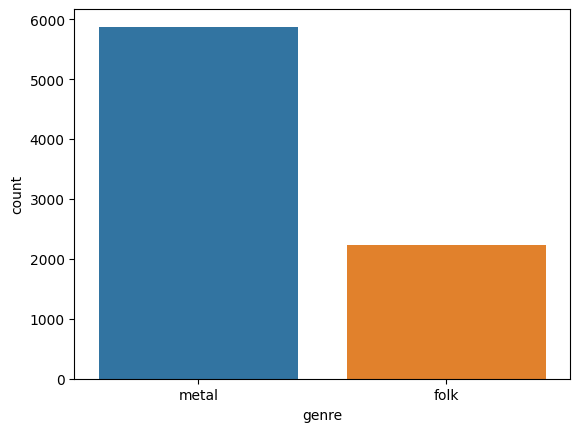

In [30]:
# Plot predictions to see distribution and if there is bias
test_predictions = [classes[i] for i in predictions]
test_predictions_df = pd.DataFrame(data=test_predictions, columns=["genre"])
seaborn.countplot(test_predictions_df, x="genre")

<AxesSubplot: xlabel='genre', ylabel='count'>

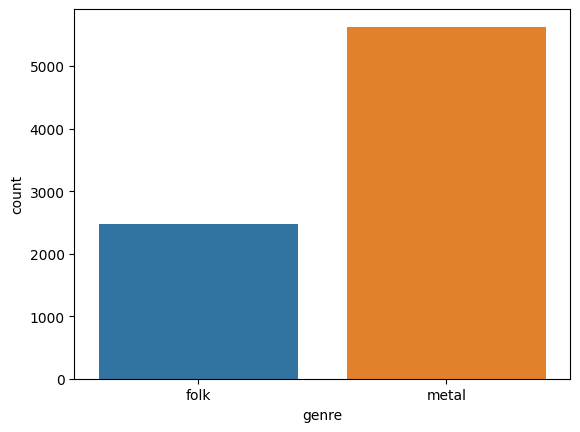

In [31]:
# Visualize the actual distribution of the test data
test_actuals = [classes[i] for i in Y_test]
seaborn.countplot(pd.DataFrame(data=test_actuals, columns=["genre"]), x="genre")

## Fixing the Skew

In [32]:
min(np.bincount(Y))

12662

In [33]:
from sklearn.utils import resample

def undersample(X, Y):
    return resample(X, Y, n_samples=min(np.bincount(Y)), random_state=RANDOM_STATE)

def oversample(X, Y):
    return resample(X, Y, n_samples=max(np.bincount(Y)), random_state=RANDOM_STATE)

def midsample(X, Y):
    return resample(X, Y, n_samples=(min(np.bincount(Y)) + max(np.bincount(Y))) // 2, random_state=RANDOM_STATE)

In [34]:
undersampled_X_train, undersampled_Y_train = undersample(X_train, Y_train)
# train model
model = train_model_logistic(undersampled_X_train, undersampled_Y_train)
## Evaluating the Model
evaluate_logistic_model(model, undersampled_X_train, undersampled_Y_train, X_test, Y_test)


Training:
 accuracy: 88.94

Testing: 
 accuracy: 81.29
 AUC value: 87.13


c:\Users\ajiev\cs175-project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
oversampled_X_train, oversampled_Y_train = oversample(X_train, Y_train)
# train model
model = train_model_logistic(oversampled_X_train, oversampled_Y_train)
## Evaluating the Model
evaluate_logistic_model(model, oversampled_X_train, oversampled_Y_train, X_test, Y_test)


Training:
 accuracy: 86.79

Testing: 
 accuracy: 82.51
 AUC value: 88.39


c:\Users\ajiev\cs175-project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
midsampled_X_train, midsampled_Y_train = midsample(X_train, Y_train)
# train model
model = train_model_logistic(midsampled_X_train, midsampled_Y_train)
## Evaluating the Model
evaluate_logistic_model(model, midsampled_X_train, midsampled_Y_train, X_test, Y_test)


Training:
 accuracy: 87.39

Testing: 
 accuracy: 82.65
 AUC value: 88.25


c:\Users\ajiev\cs175-project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
